# Decision Tree

In [68]:
#Importing a library that is useful to read the original file
import pandas as pd
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors 
from matplotlib import cm
import math 
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256))) 
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Load dataset

In [3]:
data_original=pd.read_csv('/Users/Simone/Desktop/Programmi/DDA/hlsp_deep47tuc_hst_acs_47tuc_f606w-f814w_v1_catalog.txt',delimiter='\s+')
data_original.head()

,#ID,X,Y,F606W,error,F814W,error.1,Chi,Sharp
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720


Drop the #ID column

In [4]:
Sharp = data_original.Sharp
data = data_original.drop(columns = ['#ID','Sharp'])


In [5]:
data.head()

,X,Y,F606W,error,F814W,error.1,Chi
0,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106
1,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690
2,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651
3,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059
4,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274


create target column, 3 classes : positive, negative and zero Sharp

In [6]:
data['target'] = np.zeros_like(len(data))

In [7]:
len(data.target[Sharp > 0])

28668

In [8]:
data.target[Sharp > 0] = 1

/Users/Simone/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
data.target[Sharp == 0] = 2

/Users/Simone/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Let's split dataset in training and test set, we use a categorical encoding, this way we can add more classes if needed

In [10]:
feature_names = ['X','Y','F606W','error','F814W','error.1','Chi']

In [11]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.Categorical.from_codes(data.target, ['Negative', 'Positive', 'Zero'])

In [12]:
X.head()

,X,Y,F606W,error,F814W,error.1,Chi
0,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106
1,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690
2,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651
3,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059
4,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274


we use one-hot encoding where sharps value targets are vectors :
Negative -> [100]
Positive -> [010]
Zero -> [001]


In [13]:
y = pd.get_dummies(y)
y.head()

,Negative,Positive,Zero
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


Splito dataset in train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state=1)

First of all we check how a standard decision tree performs on our dataset

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

we can print the output wuth the following lines, however without limitations on leaf number we expect to have a veri huge tree.

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Lets'check confusion matrix and accuracy of a standard decision tree

In [19]:
y_pred = dt.predict(X_test)

Lets visualize Confusion matrix

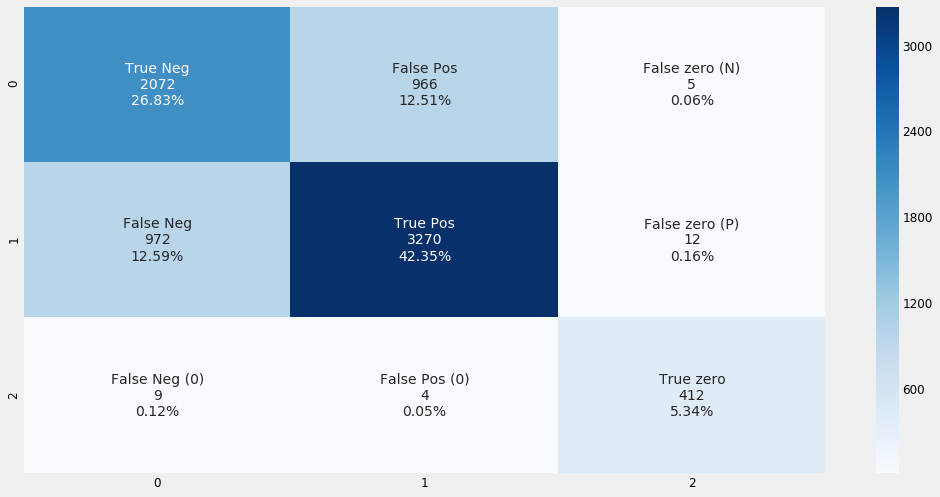

In [65]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
cf_matrix = confusion_matrix(species, predictions)

group_names = ['True Neg','False Pos','False zero (N)','False Neg',
               'True Pos', 'False zero (P)','False Neg (0)','False Pos (0)','True zero']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7451437451437452

Decision tree works alredy better then SVM Alredy, maybe a little bit of parameter tuning would help.
However its interesting checking if a boosting of this method could lead to better results, lets consider a random forest classifier

# Random Forest

In [46]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier()

# Train the model on training data
rf.fit(X_train, y_train);

/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
# Use the forest's predict method on the test data
rf_y_pred = rf.predict(X_test)

In [51]:
accuracy_score(y_test, rf_y_pred)

0.7457912457912458

it seems to work slightly better, trought RandomForestClassifier we could check a sort of feature ranking

In [52]:
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)

No handles with labels found to put in legend.


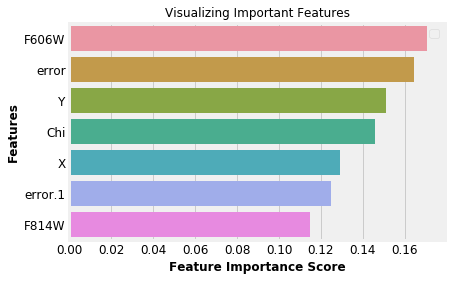

In [66]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Random forest is in general more interesting then a single tree, so we are going to tune parameter for this model, hoping in a significative increase in terms of performance.

In [57]:
from sklearn.model_selection import validation_curve

we are going to check most of the features wich are fixed in the standard RandomForestClassifier function throught a validation process

In [59]:
num_estNum = [10, 50, 100, 200,500]
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = num_estNum, cv = 3)

Greater is the number of estimators, better seems to be the performance in test set

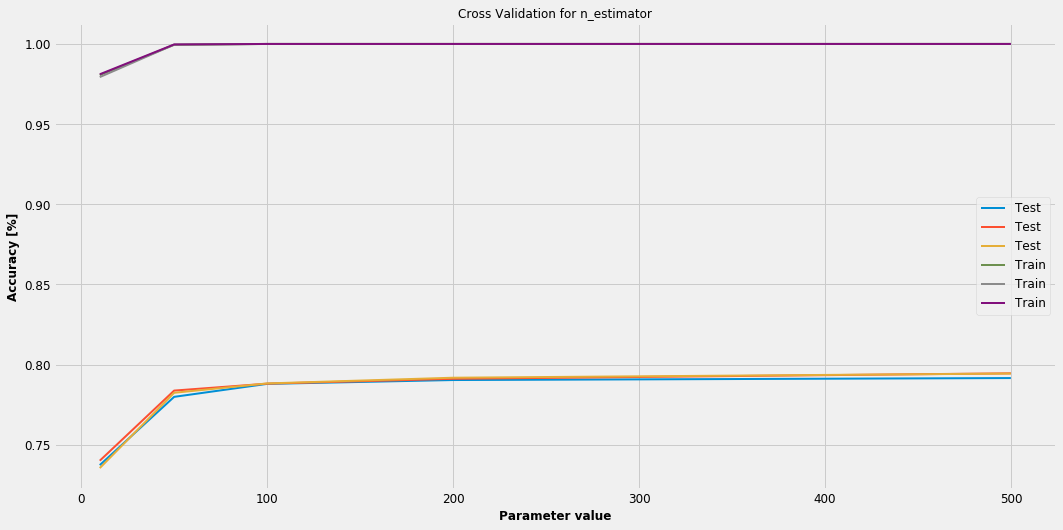

In [73]:
plt.plot(num_estNum,test_scoreNum, label = 'Test')
plt.plot(num_estNum,train_scoreNum, label = 'Train')
plt.grid(True)
plt.title('Cross Validation for n_estimator')
plt.ylabel('Accuracy [%]')
plt.xlabel('Parameter value')
plt.legend()
plt.show()

we do this for differesnt features, saving best results

In [74]:
num_estDepth = [10, 50, 100, 200,500,1000]
train_scoreDepth, test_scoreDepth= validation_curve(
                                RandomForestClassifier(n_estimators=200),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = num_estDepth, cv = 3)

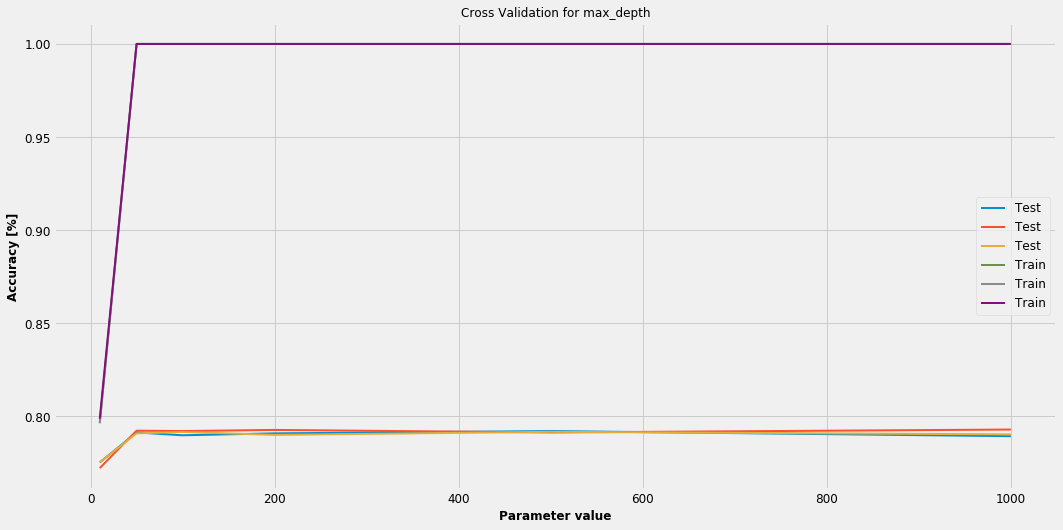

In [77]:
plt.plot(num_estDepth,test_scoreDepth,label = 'Test')
plt.plot(num_estDepth,train_scoreDepth,label = 'Train')
plt.grid(True)
plt.title('Cross Validation for max_depth')
plt.ylabel('Accuracy [%]')
plt.xlabel('Parameter value')
plt.legend()
plt.show()

In [79]:
num_estSplit = [1.,2, 5,10, 15, 20,50]
train_scoreSplit, test_scoreSplit= validation_curve(
                                RandomForestClassifier(max_depth = 10),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = num_estSplit, cv = 3)

/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/si

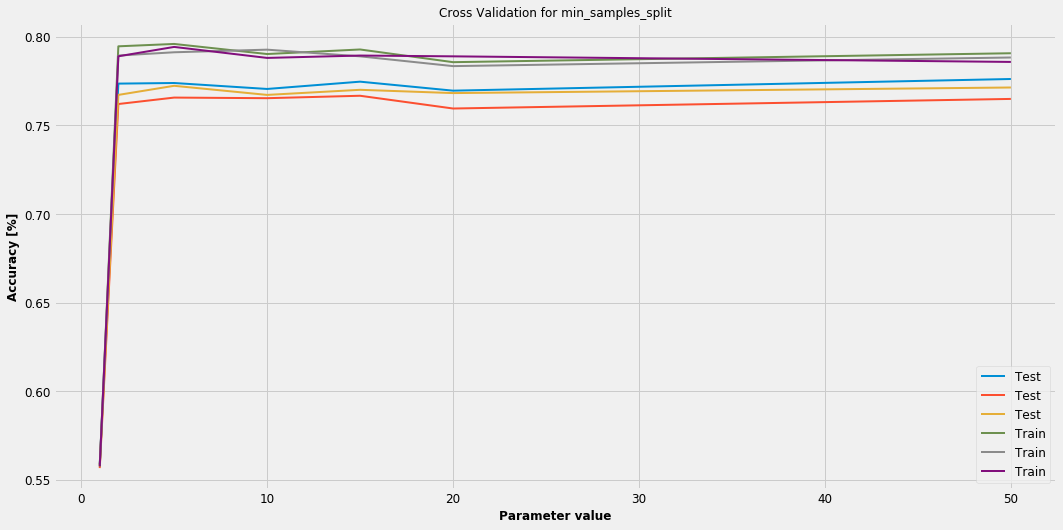

In [84]:
plt.plot(num_estSplit,test_scoreSplit,label = 'Test')
plt.plot(num_estSplit,train_scoreSplit,label = 'Train')
plt.grid(True)
plt.title('Cross Validation for min_samples_split')
plt.ylabel('Accuracy [%]')
plt.xlabel('Parameter value')
plt.legend()
plt.show()


In [85]:
num_estLeaf = [1,5,15,50,1000]
train_scoreLeaf, test_scoreLeaf= validation_curve(
                                RandomForestClassifier(max_depth = 10,min_samples_split=15),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = num_estLeaf, cv = 3)

/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/si

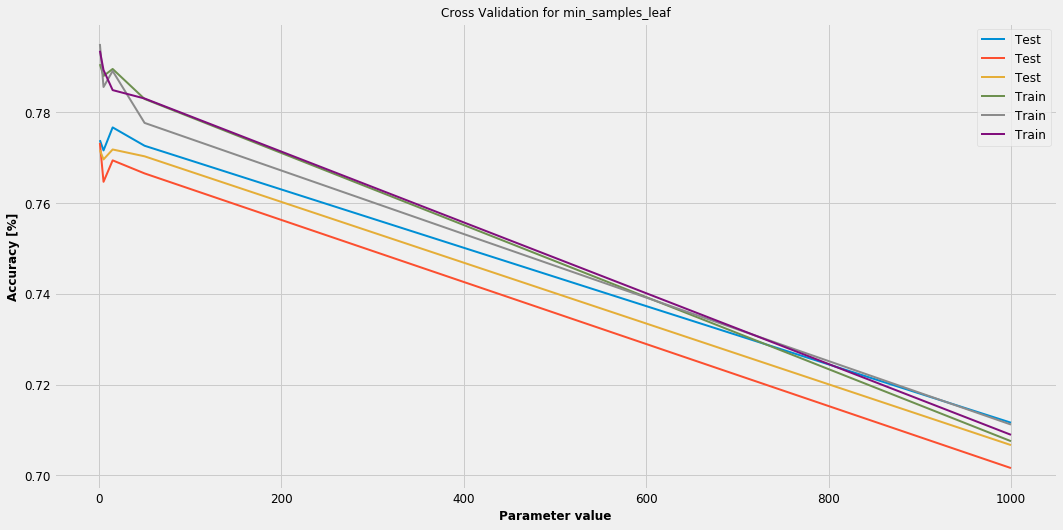

In [88]:
plt.plot(num_estLeaf,test_scoreLeaf, label = 'Test')
plt.plot(num_estLeaf,train_scoreLeaf,label = 'Train')
plt.grid(True)
plt.title('Cross Validation for min_samples_leaf')
plt.ylabel('Accuracy [%]')
plt.xlabel('Parameter value')
plt.legend()
plt.show()

In [87]:
num_est = ['auto', 'sqrt', 'log2',1,2,3,4,5,6,7]
train_scoreMaxFeat, test_scoreMaxFeat= validation_curve(
                                RandomForestClassifier(max_depth = 10,min_samples_split=15,min_samples_leaf=2),
                                X = X_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = num_est, cv = 3)

/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Simone/anaconda3/lib/python3.6/si

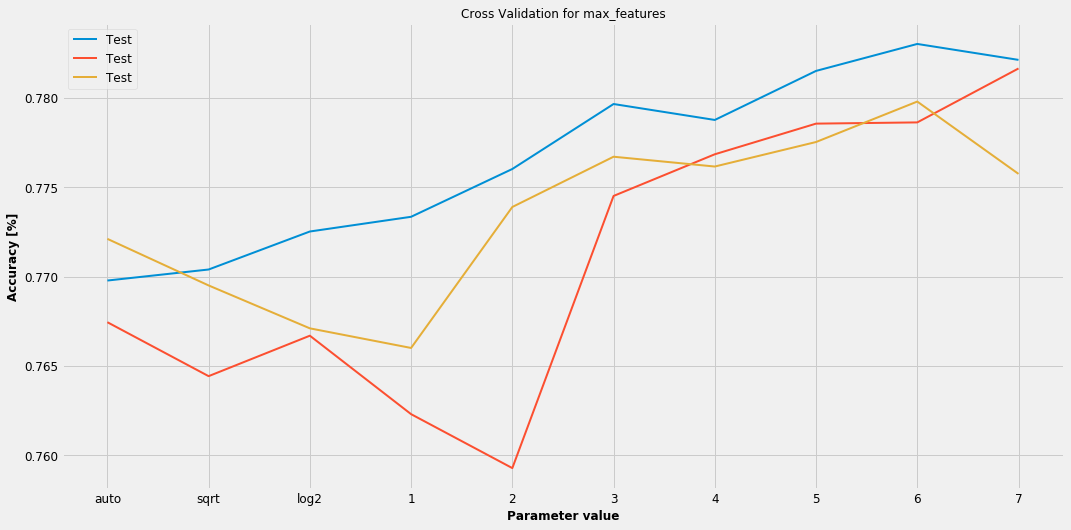

In [89]:
plt.plot(num_est,test_scoreMaxFeat,label = 'Test')
#plt.plot(num_est,train_scoreMaxFeat,label = 'Train')
plt.grid(True)
plt.title('Cross Validation for max_features')
plt.ylabel('Accuracy [%]')
plt.xlabel('Parameter value')
plt.legend()
plt.show()

At this point we are ready to build the forest with tuned parameters

In [91]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=500, max_features = 6, max_depth = 50,min_samples_split=15,min_samples_leaf=1)

# Train the model on training data
rf.fit(X_train, y_train);

In [92]:
# Use the forest's predict method on the test data
rf_y_pred = rf.predict(X_test)

In [93]:
accuracy_score(y_test, rf_y_pred)

0.7991452991452992

we could print one of the trees usend in the forest (if the lenght of the tree is not specified, the result could be a large PNG image) 

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_names, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Let's check Feature importance at this level

In [94]:
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)

No handles with labels found to put in legend.


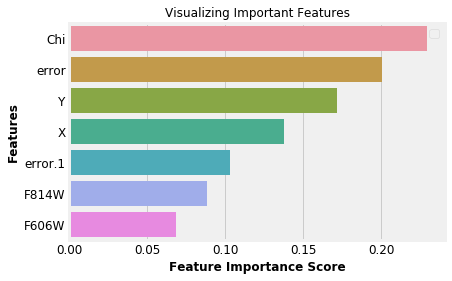

In [95]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

3d Plots of the dataset projecion on the 3 most important features, comparing model(1st plot) with actual labels (second)

In [96]:
Results = X_test.copy()
decoded_model = np.argmax(rf_y_pred, axis=1)
decoded_target = np.argmax(np.asarray(y_test), axis=1)

In [97]:
Results['actual'] = decoded_target
Results['model'] = decoded_model

In [ ]:

import plotly.express as px

fig = px.scatter_3d(Results, x='error', y='Y', z='Chi',
              color='model')
fig.show()

In [ ]:

import plotly.express as px

fig = px.scatter_3d(Results, x='error', y='Y', z='Chi',
              color='actual')
fig.show()